In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from backprocess import get_data,softmax

In [23]:
def y2indicator(y,K):
    N = len(y)
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,y[i]] = 1
        
    return ind

In [24]:
X,Y = get_data()
X,Y = shuffle(X,Y)

Y =Y.astype(int)

D = X.shape[1]
K = len(set(Y))



In [25]:
X_train = X[:-100]
Y_train = Y[:-100]
Y_train_ind = y2indicator(Y_train, K)

X_test = X[-100:]
Y_test = Y[-100:]
Y_test_ind = y2indicator(Y_test, K)

W = np.random.rand(D,K)
b = np.zeros(K)

In [26]:
def forward(X,W,b):
    return softmax(X.dot(W) + b)


In [27]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X,axis =1)

In [28]:
def classification_rate(Y,P):
    return np.mean(Y == P)

In [29]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))

In [30]:
train_cost = []
test_cost = []

learning_rate = 0.001

In [31]:
for i in range(10000):
    pY_train = forward(X_train, W, b)
    pY_test = forward(X_test, W, b)
    
    c_train = cross_entropy(Y_train_ind,pY_train)
    c_test = cross_entropy(Y_test_ind,pY_test)
    
    train_cost.append(c_train)
    test_cost.append(c_test)
    
    W -= learning_rate*X_train.T.dot(pY_train - Y_train_ind)
    b -= learning_rate*(pY_train - Y_train_ind).sum(axis = 0)
    
    if i % 1000 == 0 :
        print (i , c_train, c_test)

print ("Final train classification_rate : " + str(classification_rate(Y_train, predict(pY_train))))
print ("Final test classification_rate : " + str(classification_rate(Y_test, predict(pY_test))))

0 0.40270306386071975 0.406823735629757
1000 0.0935144115870624 0.07163171623972915
2000 0.08948701609928954 0.0674141491153914
3000 0.0880162759398059 0.06589547764273114
4000 0.08728552079537655 0.06516404545111586
5000 0.08686106861517906 0.06475687422609332
6000 0.08658971532936365 0.06450973458068161
7000 0.08640463311635624 0.06435097600040285
8000 0.08627239781494006 0.06424489647006261
9000 0.08617458327013075 0.0641719826138431
Final train classification_rate : 0.9025
Final test classification_rate : 0.9


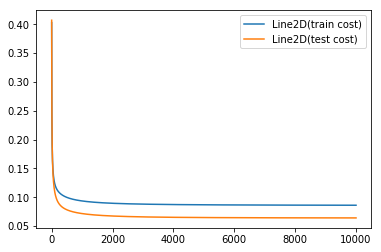

In [39]:
legend1, = plt.plot(train_cost, label = 'train cost')
legend2, = plt.plot(test_cost, label = 'test cost')

plt.legend([legend1,legend2])
plt.show()

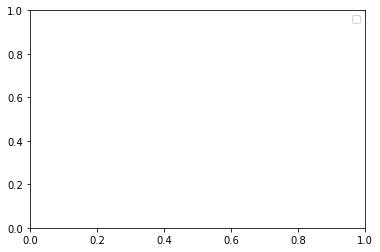